### Hudzaifah Alqarani
### 2109106089

In [1]:
import pandas as pd
df = pd.read_csv('Drug_clean.csv')
pd.set_option('display.max_columns', None)
df.head()

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.852353,3.655882,Capsule,On Label,12.590000,86.294118,3.197647,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.470000,3.290000,Liquid (Drink),Off Label,287.370000,43.000000,2.590000,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.121429,2.962857,Tablet,On Label,70.608571,267.285714,2.248571,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.000000,3.000000,Capsule,On Label,12.590000,1.000000,1.000000,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.250000,3.000000,Tablet,On Label,125.240000,15.000000,3.000000,RX


### Drop semua kolom yang bukan numerik 
Kemudian drop kolom yang dianggap tidak memengaruhi prediksi

In [2]:
df = df.select_dtypes(include=['number'])
df.drop(df.columns[4:], axis=1, inplace=True)
df.isna().sum()

EaseOfUse    0
Effective    0
Price        0
Reviews      0
dtype: int64

### Split dataset menjadi data train dan data test 
Kasus yang dipilih adalah memprediksi nilai dari New Deaths berdasarkan New Cases, New Recovered, dan Active Case 
Fitur = New Cases, New Recovered, dan Active Cas s
TargetEffectiveths

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['Effective'], axis=1)
y = df['Effective']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Membuat model dengan 5 layer 
Menggunakan activation relu dengan 3 inpu 
Menggunakan 1 output layer karena target hanya 1 dan menggunakan default activation yaitu linear

In [8]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1) # Output layer untuk regresi dengan 1 neuron (linear)
])

### Membuat fungsi r2_score untuk metrics model, karena tidak ada fungsi default untuk metrics r2_score

In [9]:
from tensorflow.keras import backend as K

def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

### Compile model dengan optimizer Adam dan loss huber karena huber dapat mengabaikan data outlier, serta menggunakan metrics r2_score yang telah dibuat di atas

In [10]:
model.compile(optimizer='Adam', loss='huber', metrics=[r2_score])

### Membuat callback untuk memonitoring val_loss### 
Menggunakan library ModelCheckpoint untuk menyimpan hasil terbaik selama pelatihan### 
Misalkan val_loss tidak menurun atau tidak membaik

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Model checkpoint untuk menyimpan model terbaik selama pelatihan (dengan val_loss terendah)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

### Train data dengan jumlah epochs 500 dan juga menggunakan callback yang telah dibuat di atas

In [14]:
trained_data = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=model_checkpoint)

Epoch 1/500
15/18 [========================>.....] - ETA: 0s - loss: 8.5887 - r2_score: -1169.3700   
Epoch 1: val_loss improved from inf to 3.35089, saving model to best_model.h5
18/18 [==============================] - 1s 22ms/step - loss: 7.8523 - r2_score: -978.4651 - val_loss: 3.3509 - val_r2_score: -42.7365
Epoch 2/500
16/18 [=========================>....] - ETA: 0s - loss: 3.3401 - r2_score: -145.6189
Epoch 2: val_loss improved from 3.35089 to 2.67695, saving model to best_model.h5
18/18 [==============================] - 0s 8ms/step - loss: 3.2604 - r2_score: -130.8100 - val_loss: 2.6769 - val_r2_score: -20.5063


C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 3/500
 1/18 [>.............................] - ETA: 0s - loss: 2.1737 - r2_score: -8.0739
Epoch 3: val_loss improved from 2.67695 to 2.04109, saving model to best_model.h5
18/18 [==============================] - 0s 9ms/step - loss: 2.4222 - r2_score: -76.6772 - val_loss: 2.0411 - val_r2_score: -11.8756
Epoch 4/500
 1/18 [>.............................] - ETA: 0s - loss: 1.7020 - r2_score: -5.4140
Epoch 4: val_loss improved from 2.04109 to 1.90545, saving model to best_model.h5
18/18 [==============================] - 0s 6ms/step - loss: 2.3131 - r2_score: -51.5768 - val_loss: 1.9054 - val_r2_score: -27.1769
Epoch 5/500
 1/18 [>.............................] - ETA: 0s - loss: 1.0304 - r2_score: -4.7762
Epoch 5: val_loss improved from 1.90545 to 1.34905, saving model to best_model.h5
18/18 [==============================] - 0s 6ms/step - loss: 2.4337 - r2_score: -81.2562 - val_loss: 1.3490 - val_r2_score: -13.6044
Epoch 6/500
 1/18 [>.............................] - ETA: 0s - loss

### prediksi model menggunakan fitur

In [15]:
y_pred = model.predict(X_test)
y_pred

5/5 [==============================] - 0s 2ms/step


array([[3.692905 ],
       [3.2577033],
       [3.7142265],
       [4.4807906],
       [3.3669538],
       [4.007893 ],
       [4.3945665],
       [4.6037436],
       [3.7277427],
       [3.7997904],
       [3.1957068],
       [4.1310687],
       [4.2245207],
       [4.129347 ],
       [4.0095377],
       [4.3080573],
       [4.5444574],
       [3.200255 ],
       [3.9814067],
       [3.8541784],
       [3.117629 ],
       [4.0598764],
       [3.8426766],
       [3.117629 ],
       [3.309285 ],
       [8.701139 ],
       [3.068915 ],
       [3.486134 ],
       [4.320647 ],
       [4.383583 ],
       [3.5761895],
       [3.963224 ],
       [4.1654444],
       [3.3299625],
       [4.5616508],
       [3.3933218],
       [3.7395995],
       [3.5836918],
       [3.4653144],
       [4.1575685],
       [2.9193146],
       [3.2946312],
       [3.677706 ],
       [3.6520898],
       [3.7856584],
       [3.8198147],
       [4.2174845],
       [3.3717296],
       [4.10402  ],
       [3.9890046],


### Evaluasi model menggunakan fungsi r2_score0

In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")

R2 Score: 0.1457


### Evaluasi mode menggunakan fungsi evaluate

In [17]:
eval_result = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.2611 - r2_score: -0.0354


### Membuat grafik yang menunjukkan perkembangan model### 
Grafik ini menjukkan perkembangan metrics r2_score dengan jumlah epochs

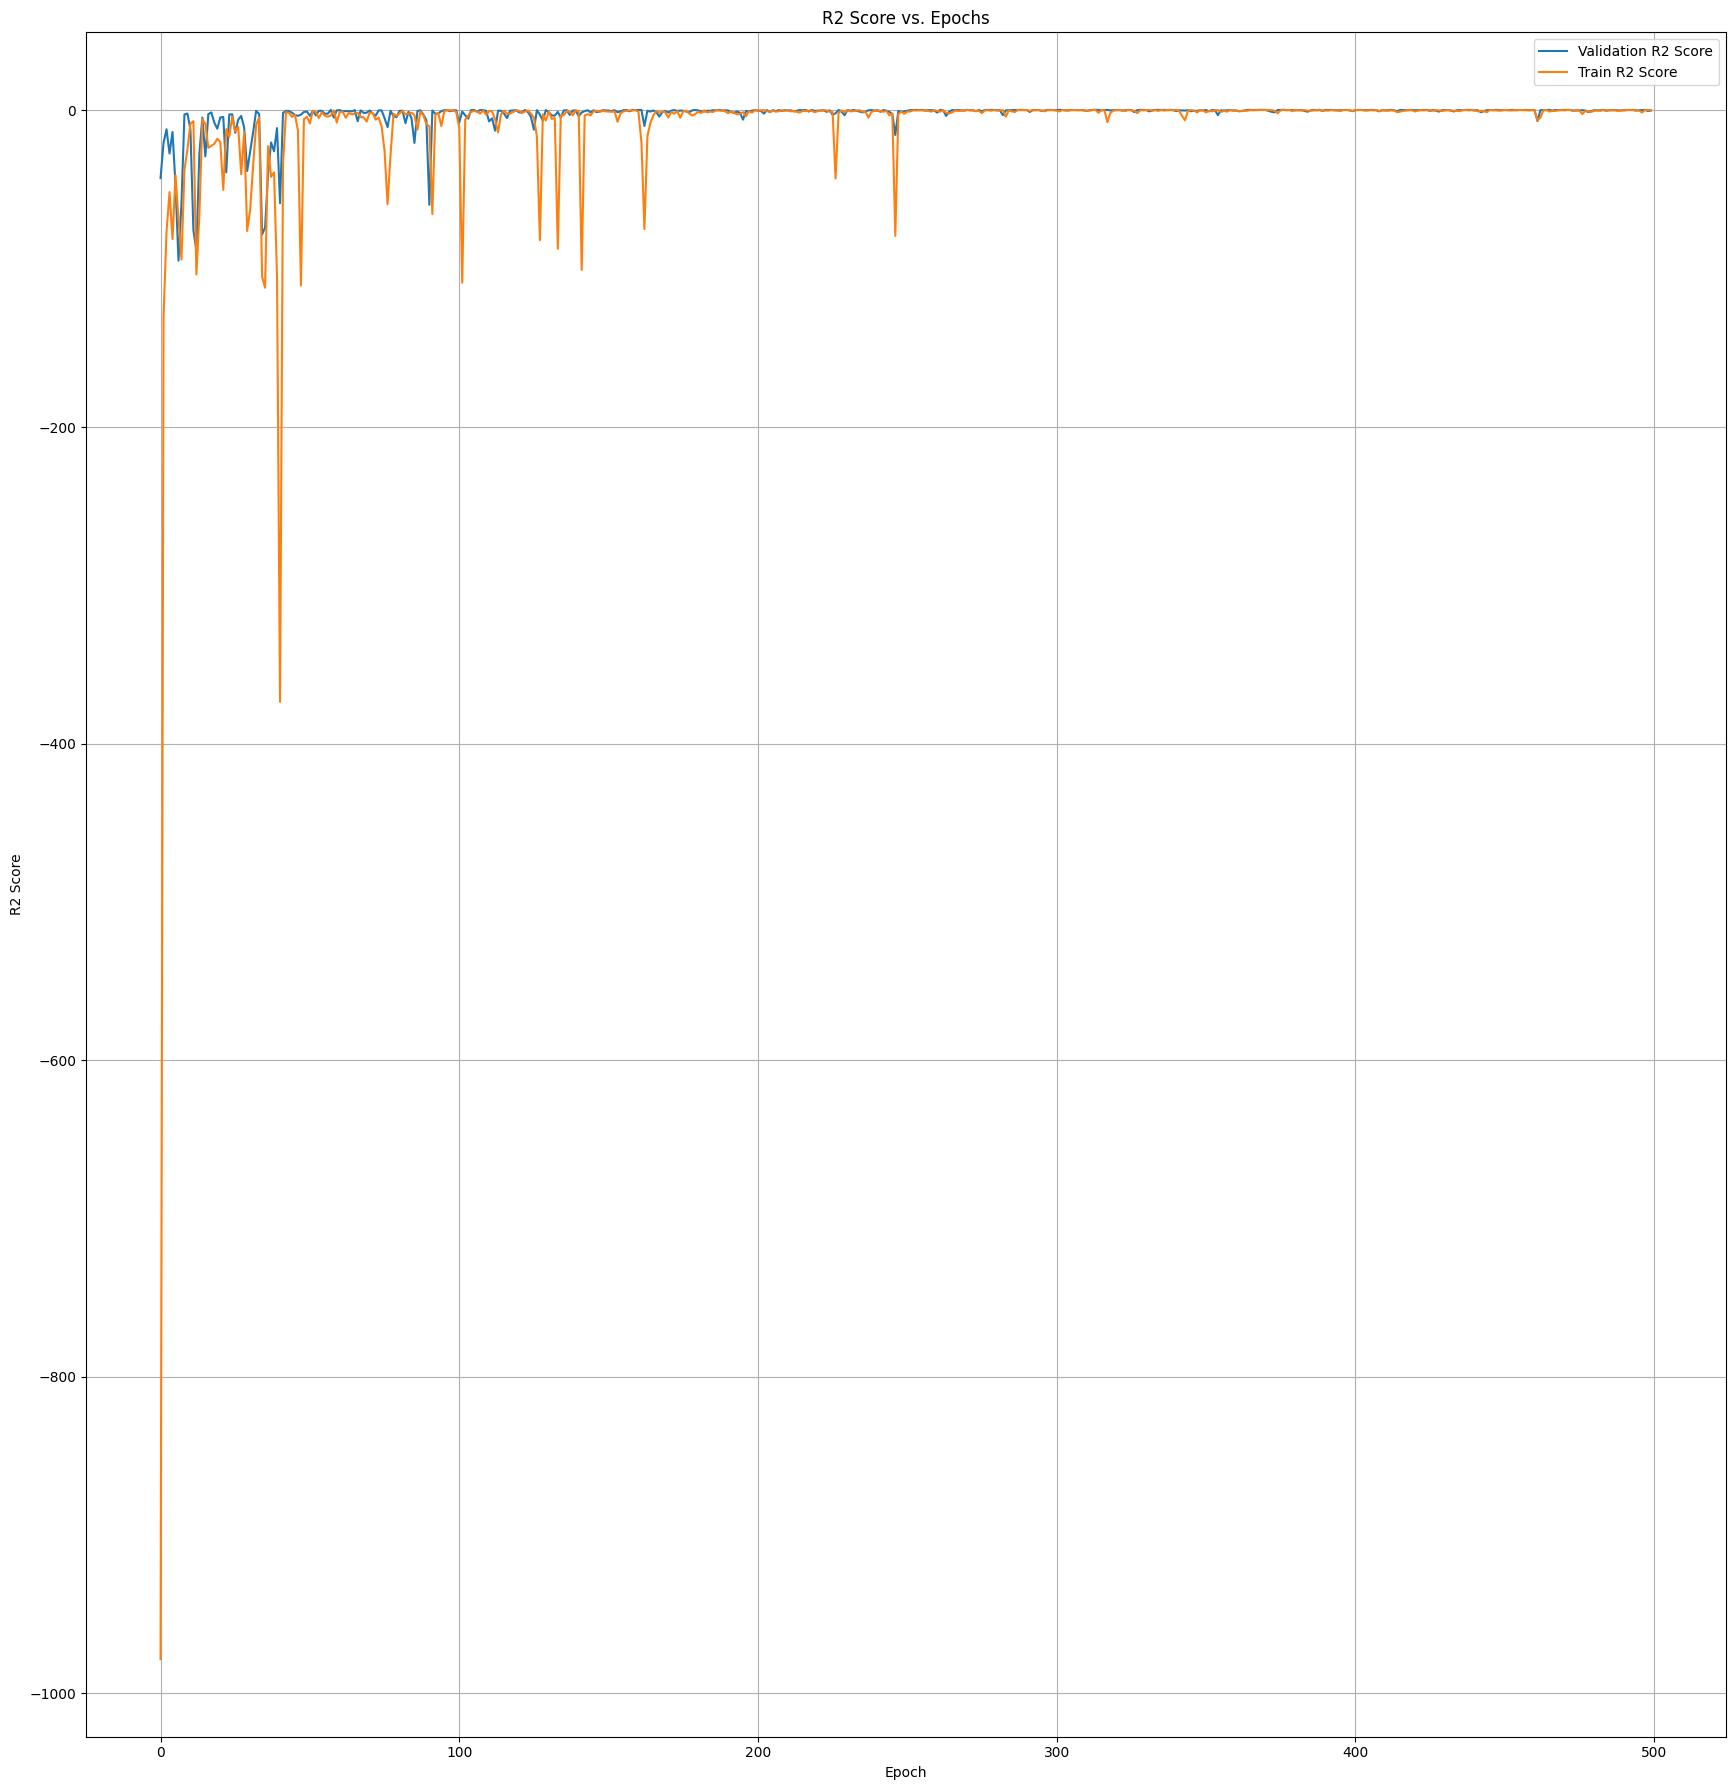

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(34, 18))
plt.subplot(1, 2, 1)
plt.plot(trained_data.history['val_r2_score'], label='Validation R2 Score')
plt.plot(trained_data.history['r2_score'], label='Train R2 Score')
plt.title('R2 Score vs. Epochs')
plt.ylabel('R2 Score')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Grafik ini menjukkan perkembangan train loss dengan jumlah epochs

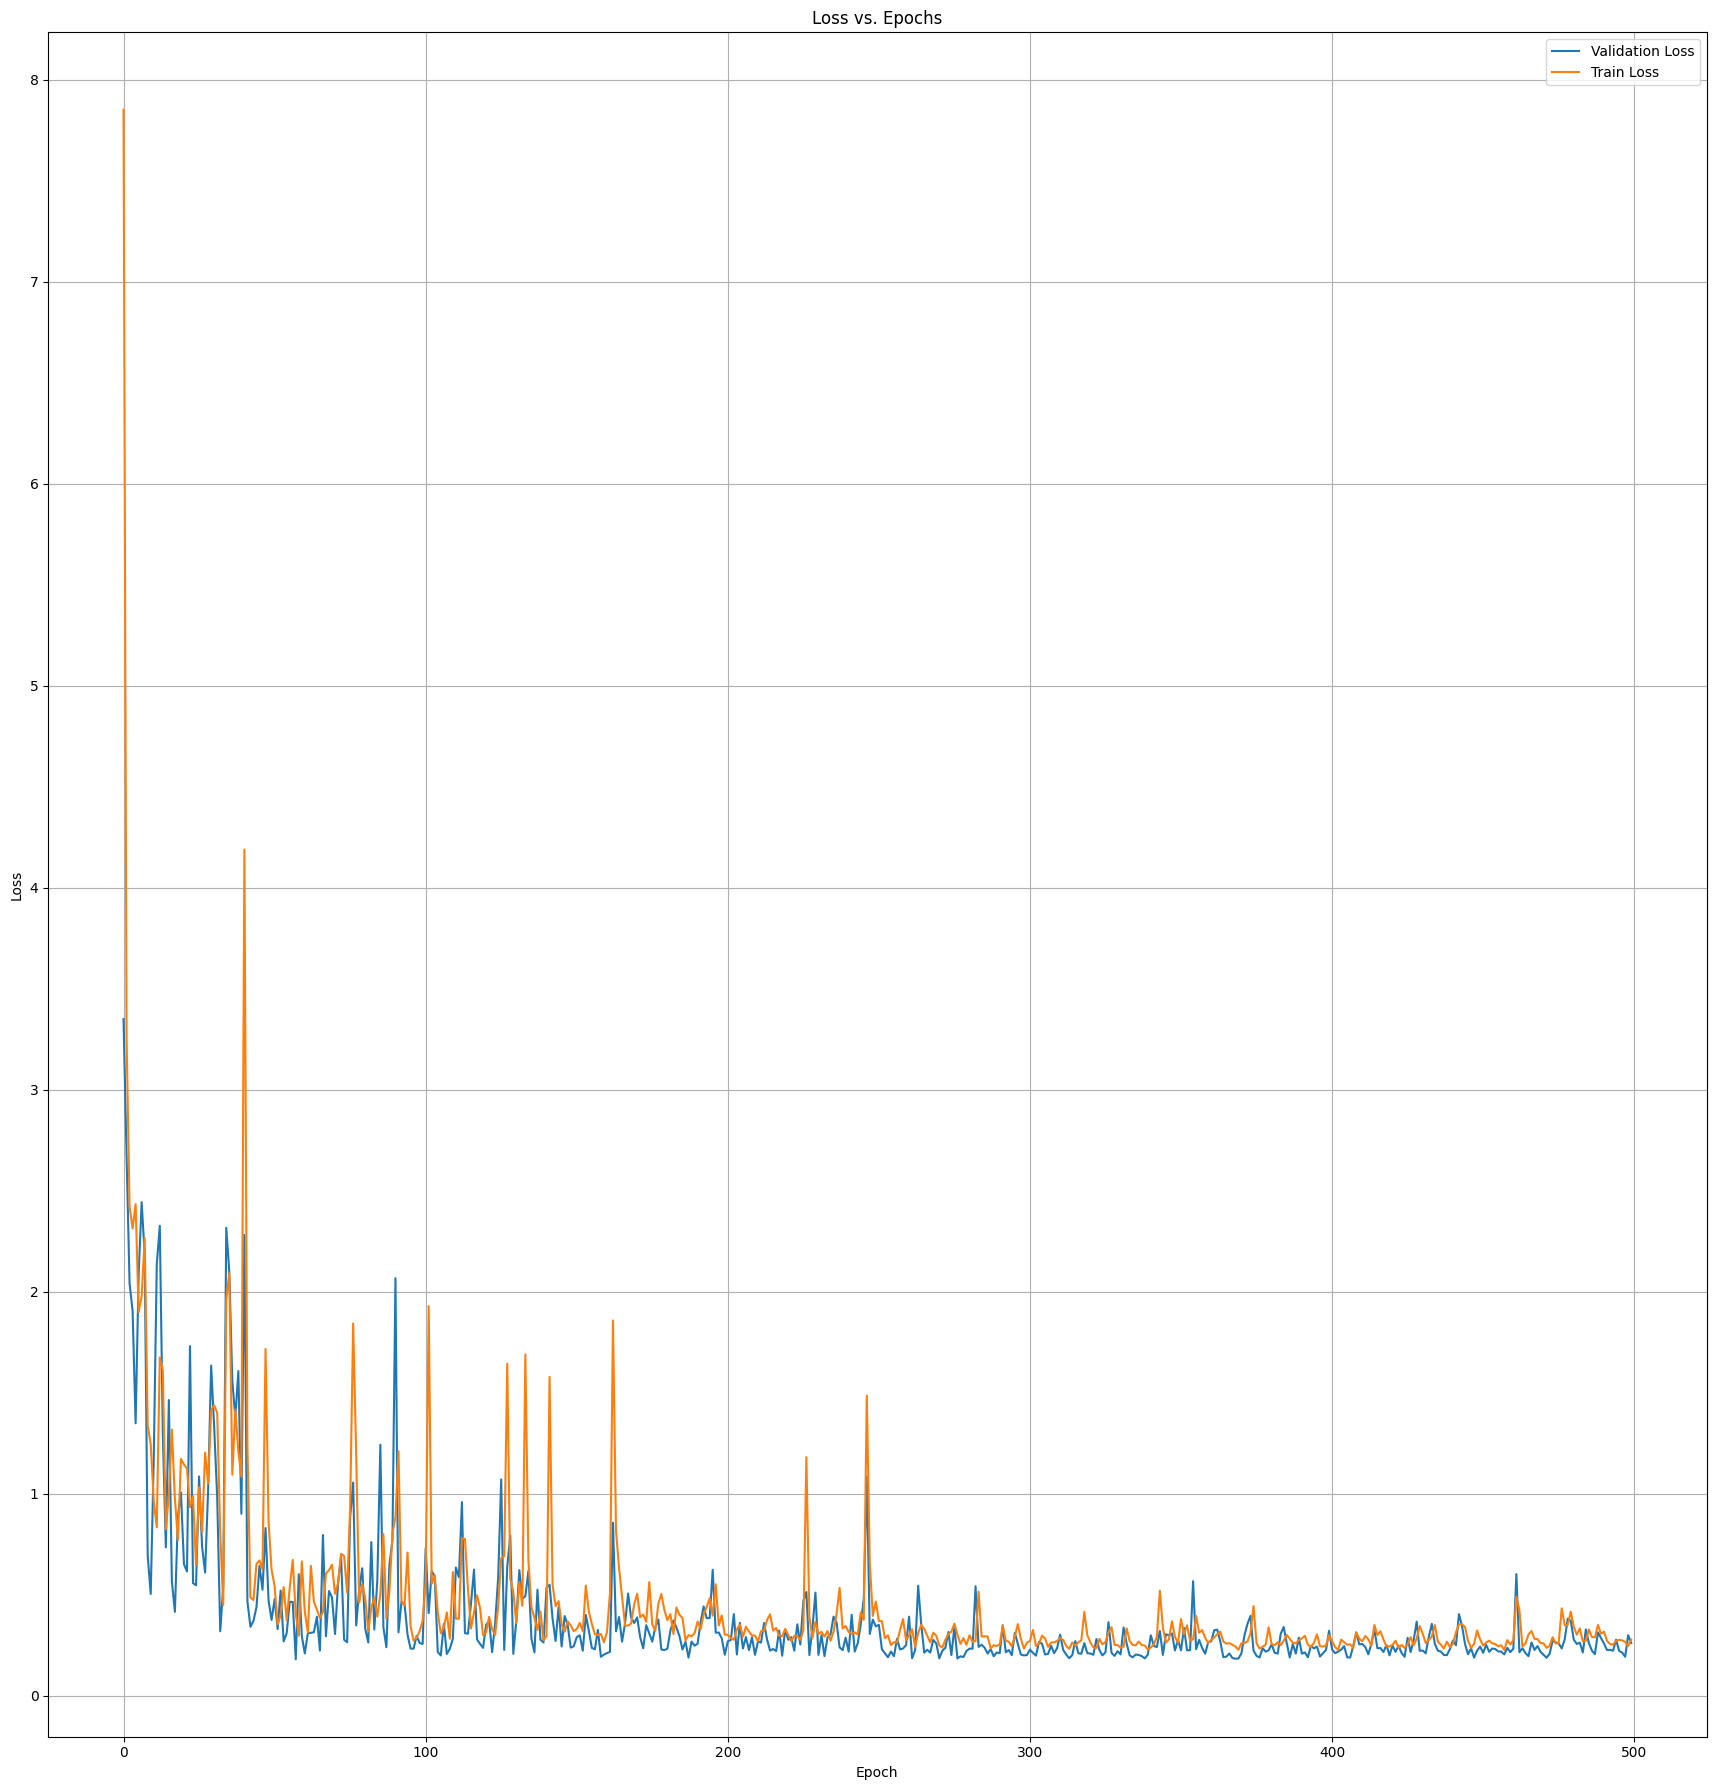

In [19]:
# Buat grafik Loss
plt.figure(figsize=(34, 18))
plt.subplot(1, 2, 2)
plt.plot(trained_data.history['val_loss'], label='Validation Loss')
plt.plot(trained_data.history['loss'], label='Train Loss')
plt.title('Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()